In [18]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [22]:
#0) prepapre data

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

sc = StandardScaler() #to zero mean 1 standard deviation

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
Y_train = torch.from_numpy(Y_train.astype(np.float32))
Y_test = torch.from_numpy(Y_test.astype(np.float32))

Y_train = Y_train.view(Y_train.shape[0],1)
Y_test = Y_test.view(Y_test.shape[0],1)



In [24]:
X_test.shape

torch.Size([114, 30])

#### Standard Scalaer

(array([ 12.,  31.,  92., 188., 281., 273., 198., 103.,  35.,  21.]),
 array([-2.98657981, -2.39757835, -1.80857688, -1.21957541, -0.63057395,
        -0.04157248,  0.54742899,  1.13643045,  1.72543192,  2.31443339,
         2.90343485]),
 <BarContainer object of 10 artists>)

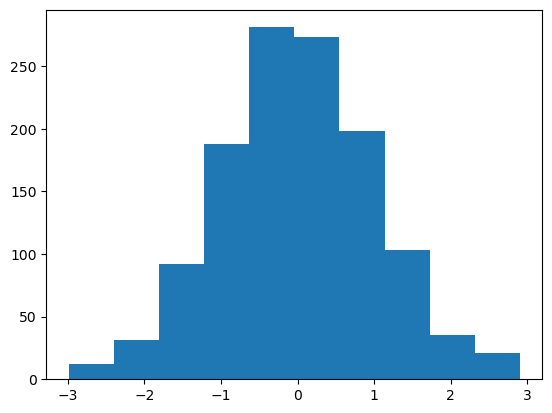

In [17]:
dat = np.random.normal(5,4,size=1234)
sc = StandardScaler()
dat = dat.reshape(1234,-1)
dat = sc.fit_transform(dat)
plt.hist(dat)

### Model


In [ ]:
#1)model
#f = wx + b, sigmoid at the end]
class LogistRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogistRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted
model = LogistRegression(n_features)
#2)loss and optimization
loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)

#3)training loop

for